### 1. Googled Examples for basics of matplotlib.pyplot
### 2. Visualizing Time Series in python
### 3. Time Series Analysis in python
### 4. Machine Learning for time Series in Python

While plottingtimeseries data, we dont need x and y both coordinates as be default we have x-axis as date in the form of index.

With datetime indx pandas creates reasonable spaced datelabels for plotting xaxis
plot creates lines
.hist
.scatter

## plot Versus scatter: A Note on Efficiency
Aside from the different features available in plt.plot and plt.scatter, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In plt.plot, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, plt.plot should be preferred over plt.scatter for large datasets.


In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.figure.Figure

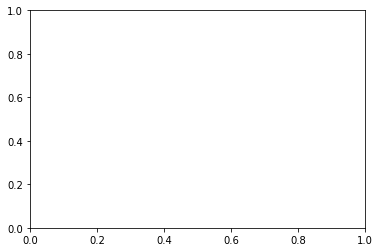

In [16]:
fig, _ = plt.subplots()
type(fig)

###
we created two variables with plt.subplots().The first is a top-level Figure object. The second is a “throwaway” variable that we don’t need just yet, denoted with an underscore. 

Using attribute notation, it is easy to traverse down the figure hierarchy and see the first tick of the y axis of the first Axes object:

In [17]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

[]

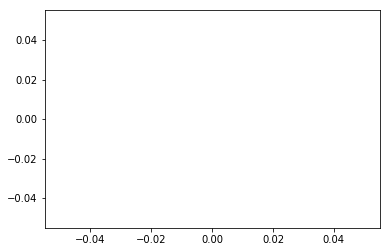

In [18]:
plt.plot()

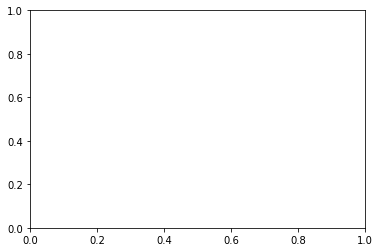

In [19]:
# get the current axes object.gca() is function, not a method here.
ax=plt.gca()

In [20]:
## Call the gca() method on the current figure . gcf is get current figure
gcf().gca(**kwarg)

NameError: name 'gcf' is not defined

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


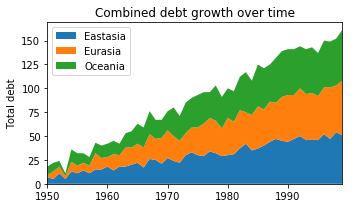

In [23]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

## 
Here’s what’s going on above:

After creating three random time series, we defined one Figure (fig) containing one Axes (a plot, ax).

We call methods of ax directly to create a stacked area chart and to add a legend, title, and y-axis label. Under the object-oriented approach, it’s clear that all of these are attributes of ax.

tight_layout() applies to the Figure object as a whole to clean up whitespace padding.

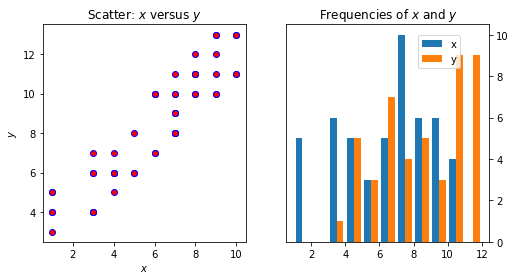

In [27]:
### Example 2:

x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

plt.show()

##
There’s a little bit more going on in this example:

Because we’re creating a “1x2” Figure, the returned result of plt.subplots(1, 2) is now a Figure object and a NumPy array of Axes objects. (You can inspect this with fig, axs = plt.subplots(1, 2) and taking a look at axs.)

We deal with ax1 and ax2 individually, which would be difficult to do with the stateful approach. The final line is a good illustration of the object hierarchy, where we are modifying the yaxis belonging to the second Axes, placing its ticks and ticklabels to the right.

Text inside dollar signs utilizes TeX markup to put variables in italics.

## 
Above, fig (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grab the first one.